## Questionário 73 (Q73)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

Para responder às questões, leia o texto introdutório a seguir.

>Diversos países firmam acordos bilaterais com o intuito de fortalecer interesses mútuos. Uma rede multinacional da qual o Brasil faz parte começou a ser modelada por cientistas de dados a partir de um grafo não dirigido em que os _nós_ do grafo representam os países, renomeados segundo o código Alpha-3 do padrão [IBAN](https://www.iban.com/country-codes), e as _arestas_ representam a existência de um acordo bilateral.
> A figura abaixo mostra, por exemplo, um subgrafo dessa rede formado por Áustria (AUT), Bélgica (BEL), Brasil (BRA), Emirados Árabes Unidos (ARE) e Estados Unidos (USA).
```{figure} ../figs/q/q73.png
---
width: 660px
name: rede
---
Exemplo de rede de países que mantêm acordos bilaterais.
```
> O arquivo `paises-acordo-bilateral.txt` contém, implicitamente, a lista de conexões que formam o grafo da rede inteira, as quais são determinadas por pares do tipo `x,y`, onde `x` e `y` são nomes de países não padronizados. Por exemplo, o par `China,Norway` indica que há um acordo bilateral entre China e Noruega.

>*Obs.:* acesse o arquivo [aqui](https://github.com/gcpeixoto/ICD/tree/main/database/paises-acordo-bilateral.txt).

**Questão 1.** Faça a raspagem da tabela de códigos de países disponíveis na página [IBAN](https://www.iban.com/country-codes) para recuperar os códigos Alpha-3 para cada país contido na lista de arestas e crie um segundo arquivo chamado `paises-acordo-bilateral-IBAN.txt`. Use o módulo `networkx` e a função `read_edgelist` para construir o grafo da rede multinacional. Em seguida, assinale a alternativa correta para a tupla (número de nós, número de arestas) que você encontrou. Sugestão: use as funções `get_table_head` e `get_table_body` criadas no capítulo do livro de ICD sobre _Raspagem de dados_.

A. (14, 28)

B. (16, 30)

C. (12, 36)

D. (14, 38)

## GABARITO

Alternativa **D**.

## Geração de arquivo de acordo bilateral

In [1]:
import numpy as np
np.random.seed(3)

countries = ('Argentina','Austria','Belgium','Brazil','China',
             'United Arab Emirates (the)',
             'United States of America (the)','Germany',
             'India','Israel','Netherlands (the)',
             'Norway','Russian Federation (the)','South Africa')

adj = np.random.randint(0,2,(len(countries),len(countries)))
adj[np.diag_indices_from(adj)] = 0
adj = np.tril(adj)
adj = np.tril(adj) + np.tril(adj).T 

f = open('../database/paises-acordo-bilateral.txt','w')
for i in range(len(countries)):
    for j in range(i+1,len(countries)):
        if adj[i,j] == 1:
            s = countries[i] + ',' + countries[j] + '\n'
            f.write(s)
            
f.close()

## Raspagem do IBAN

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx

html = urlopen('https://www.iban.com/country-codes')
bs = BeautifulSoup(html.read(),'html.parser')

# extrai cabeçalho
def get_table_head(t):
    '''Lê objeto tabela e extrai header para lista'''
    res = []
    thead = t.find('thead')
    th = thead.find_all('th')
    for f in th:
        res.append(f.getText().strip())
    return res

t_header = get_table_head(bs.body)

# extrai linhas
def get_table_body(t):
    res = []
    tbody = t.find('tbody')
    tr = tbody.find_all('tr')
    for row in tr:
        this_row = []
        row_fields = row.find_all('td')
        for f in row_fields:
            this_row.append(f.getText().strip())
            res.append(this_row)
    return res

r = get_table_body(bs.body)
# DataFrame
iban = pd.DataFrame(r,columns=t_header).drop_duplicates().drop(columns=['Alpha-2 code','Numeric']).reset_index(drop=True)

## Escreve edgelist

In [3]:
f = open('../database/paises-acordo-bilateral.txt','r')
g = open('../database/paises-acordo-bilateral-IBAN.txt','w')

for i in f.readlines():
    p1,p2 = i.strip().split(',') 
    p1 = iban[iban['Country'] == p1]['Alpha-3 code'].values
    p2 = iban[iban['Country'] == p2]['Alpha-3 code'].values
    p1,p2 = p1[0],p2[0]
    s = p1 + ',' + p2 + '\n'
    g.write(s)

f.close()
g.close()

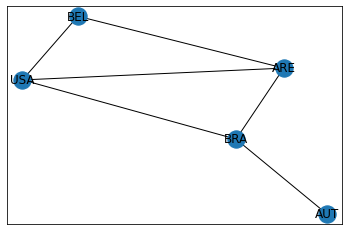

In [4]:
G = nx.read_edgelist('../database/paises-acordo-bilateral-IBAN.txt',delimiter=',')
Gsub = nx.subgraph(G,['AUT','ARE','USA','BRA','BEL',''])
nx.draw_networkx(Gsub,with_labels=True)

In [5]:
G.number_of_nodes(),G.number_of_edges()

(14, 38)

**Questão 2.** A _centralidade de grau_ `deg`, calculada para cada nó do grafo completo pelo módulo `networkx`, pode ser interpretada, para este estudo de caso, como uma medida relativa da pré-disposição de um país para se abrir à globalização. Neste sentido, calcule `deg` e assinale a opção cujo país é o mais **fechado** ao fenômeno da globalização.

A. CHN 

B. BRA

C. ARG

D. NLD

## GABARITO

Alternativa **D**.

In [6]:
# minima deg é NLD
deg = nx.degree_centrality(G)
deg = {k: v for k, v in sorted(deg.items(), key=lambda item: item[1],reverse=True)}
deg

{'DEU': 0.6923076923076923,
 'ISR': 0.6153846153846154,
 'ARE': 0.6153846153846154,
 'NOR': 0.5384615384615385,
 'BEL': 0.46153846153846156,
 'USA': 0.46153846153846156,
 'CHN': 0.38461538461538464,
 'AUT': 0.38461538461538464,
 'RUS': 0.38461538461538464,
 'ARG': 0.3076923076923077,
 'BRA': 0.3076923076923077,
 'ZAF': 0.23076923076923078,
 'IND': 0.23076923076923078,
 'NLD': 0.23076923076923078}

**Questão 3.** Semelhantemente à interpretação da questão anterior, a _centralidade de intermediação_ `bet` fornece uma medida relativa de quão boa é a confiança e respeitabilidade diplomática de um país para a concretização de acordos. Calcule `bet` e assinale a opção cujo país é o mais respeitado para intermediar acordos.

A. AUT

B. ZAF

C. DEU

D. ISR

## GABARITO

Alternativa **C**.

In [7]:
# maxima bet é DEU
bet = nx.betweenness_centrality(G)
bet = {k: v for k, v in sorted(bet.items(), key=lambda item: item[1],reverse=True)}
bet

{'DEU': 0.16265262515262513,
 'ISR': 0.12664835164835167,
 'ARE': 0.09372710622710621,
 'CHN': 0.0839896214896215,
 'NOR': 0.06858974358974358,
 'AUT': 0.050534188034188035,
 'USA': 0.03774420024420024,
 'ARG': 0.027472527472527472,
 'BEL': 0.026098901098901096,
 'RUS': 0.025106837606837604,
 'IND': 0.023504273504273504,
 'BRA': 0.013247863247863246,
 'NLD': 0.01282051282051282,
 'ZAF': 0.004273504273504273}

In [8]:
!rm ../database/paises-acordo-bilateral-IBAN.txt